In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import re
import string
import nltk
from nltk.corpus import stopwords

In [2]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nemadesir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    stop_words = set(stopwords.words('english'))
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [4]:
train_df = pd.read_csv('twitter_training.csv')
validation_df = pd.read_csv('twitter_validation.csv')

In [5]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
validation_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
train_df.columns = ['ID', 'Entity', 'Sentiment', 'Content']

In [8]:
train_df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
validation_df.columns = ['ID', 'Entity', 'Sentiment', 'Content']

In [10]:
validation_df.head()

,ID,Entity,Sentiment,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
train_df['Processed Content'] = train_df['Content'].apply(preprocess_text)
validation_df['Processed Content'] = validation_df['Content'].apply(preprocess_text)

In [12]:
train_df.head()

,ID,Entity,Sentiment,Content,Processed Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder


In [13]:
validation_df.head()

,ID,Entity,Sentiment,Content,Processed Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp i’ve madeleine mccann cellar past ye...


In [14]:
label_encoder = LabelEncoder()
train_df['Sentiment Encoded'] = label_encoder.fit_transform(train_df['Sentiment'])
validation_df['Sentiment Encoded'] = label_encoder.transform(validation_df['Sentiment'])

In [15]:
train_df.head()

,ID,Entity,Sentiment,Content,Processed Content,Sentiment Encoded
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,3
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,3
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,3
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,3
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder,3


In [16]:
validation_df.head()

,ID,Entity,Sentiment,Content,Processed Content,Sentiment Encoded
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...,2
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...,1
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,1
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...,2
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp i’ve madeleine mccann cellar past ye...,1


In [17]:
X_train = train_df['Processed Content']
y_train = train_df['Sentiment Encoded']
X_validation = validation_df['Processed Content']
y_validation = validation_df['Sentiment Encoded']

In [18]:
print("Training Features and Labels:")
print(X_train.head())
print(y_train.head())

print("\nValidation Features and Labels:")
print(X_validation.head())
print(y_validation.head())

Training Features and Labels:
0              coming borders kill
1      im getting borderlands kill
2     im coming borderlands murder
3    im getting borderlands murder
4    im getting borderlands murder
Name: Processed Content, dtype: object
0    3
1    3
2    3
3    3
4    3
Name: Sentiment Encoded, dtype: int64

Validation Features and Labels:
0    bbc news amazon boss jeff bezos rejects claims...
1    microsoft pay word functions poorly samsungus ...
2    csgo matchmaking full closet hacking truly awf...
3    president slapping americans face really commi...
4    hi eahelp i’ve madeleine mccann cellar past ye...
Name: Processed Content, dtype: object
0    2
1    1
2    1
3    2
4    1
Name: Sentiment Encoded, dtype: int64


In [19]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_validation_vectorized = vectorizer.transform(X_validation)

In [20]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = classifier.predict(X_validation_vectorized)

In [22]:
print("Classification Report:")
print(classification_report(y_validation, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.63      0.46      0.53       171
    Negative       0.62      0.75      0.68       266
     Neutral       0.69      0.62      0.65       285
    Positive       0.66      0.71      0.68       277

    accuracy                           0.65       999
   macro avg       0.65      0.63      0.64       999
weighted avg       0.65      0.65      0.65       999



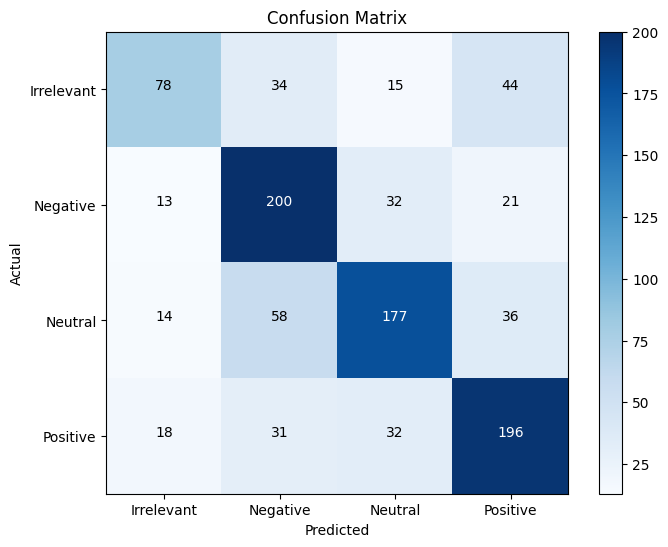

In [23]:
conf_matrix = confusion_matrix(y_validation, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Determine the number of labels
num_labels = len(label_encoder.classes_)
tick_locations = np.arange(num_labels)

# Set the tick locations and labels
plt.xticks(tick_locations, label_encoder.classes_)
plt.yticks(tick_locations, label_encoder.classes_)

# Annotate the confusion matrix
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

In [24]:
validation_df['Predicted Sentiment'] = label_encoder.inverse_transform(y_pred)
validation_df.to_csv('validation_results.csv', index=False)

print("\nValidation results saved to 'validation_results.csv'")


Validation results saved to 'validation_results.csv'
